# LSTM MAIN FILE

The first part concerns an example of execution.

The second part is for analysis.

## A simple exection for CDB001 house 

### Preprocess

In [75]:
from preprocess import *
#The number of time data you want to use for the prediction
sequence_length = 3

#You also need to choose the prediction size which should be the same as the hidden size.
predict_size = 1

#Preprocess
input_train, target_train, input_test, target_test = preprocess_data('Data/CDB001.csv', sequence_length, predict_size) # An execution with CDB001

start preprocess
Preprocessing completed in 0.15 seconds
end of preprocess


### Training 

In [92]:
from lstm_train import *
# Set up the LSTM
# Alpha is equal to learning rate for Adam optimizer
lstm = LSTM(hidden_size=predict_size)

# Train the LSTM
num_epochs = 40

#Set up for a non adam optimizer
learning_rate = 0.001

#training
lstm, train_loss_list, val_loss_list = train_lstm_forward(lstm, input_train, target_train, input_test, target_test, sequence_length, num_epochs, learning_rate, perform_predictions=True)

 
 
start of training with train lstm forward
Epoch 0 training loss [0.00068797] Validation loss [3.30334732e-05]
Epoch 10 training loss [0.00031501] Validation loss [7.70935476e-07]
Epoch 20 training loss [0.00027727] Validation loss [8.98522833e-07]
Epoch 30 training loss [0.00025745] Validation loss [8.8717969e-07]
Training completed in 40.99 seconds
end of training


### Prediction + graphs 

In [93]:
# Make predictions on the test set
predictions = []
for i in range(len(input_test)):
    for j in range(sequence_length):

        x_t = input_test[i][j]
        lstm.forward(x_t)
    predictions.append(lstm.h_t)

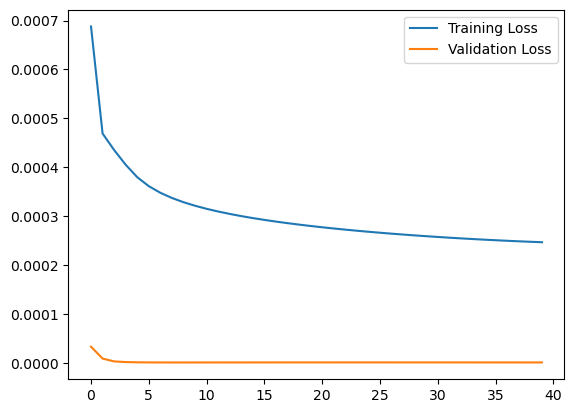

In [94]:
# Flatten the predictions array
predictions = np.array(predictions).flatten()

# Plot the training and validation loss curves
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.legend()
plt.show()

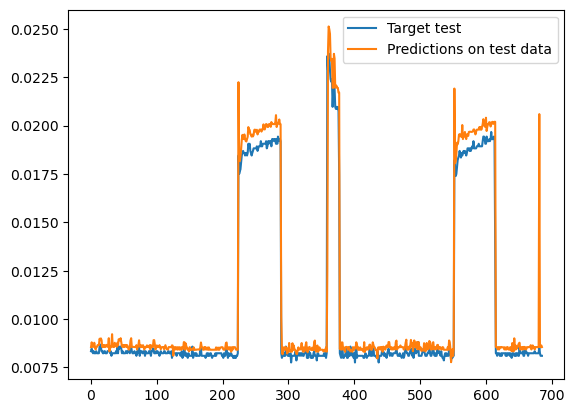

In [95]:
# Plot the predictions against the actual values
plt.plot(target_test.flatten(), label='Target test')
plt.plot(predictions, label='Predictions on test data')
plt.legend()
plt.show()

## Statistical part for stability, robustess and another analysis

### Data collecting

In [33]:
import csv

def save_results_to_csv(results, filename):
    fieldnames = ['alpha', 'sequence_length', 'predict_size', 'num_epochs', 'mse_train', 'mse_val', 'rmse_train', 'rmse_val', 'mae_train', 'mae_val']

    with open(filename, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for result in results:
            writer.writerow({
                'alpha': result['alpha'],
                'sequence_length': result['sequence_length'],
                'predict_size': result['predict_size'],
                'num_epochs': result['num_epochs'],
                'mse_train': result['metrics']['mse_train'],
                'mse_val': result['metrics']['mse_val'],
                'rmse_train': result['metrics']['rmse_train'],
                'rmse_val': result['metrics']['rmse_val'],
                'mae_train': result['metrics']['mae_train'],
                'mae_val': result['metrics']['mae_val']
            })


In [34]:
import csv
import numpy as np

def calculate_stability_metrics(train_loss_list, val_loss_list):
    """
    Calculate stability metrics for the training and validation losses.

    Args:
        train_loss_list (list): List of training loss values.
        val_loss_list (list): List of validation loss values.

    Returns:
        dict: Dictionary containing stability metrics.
    """
    stability_metrics = {}

    # Mean Squared Error (MSE)
    train_mse = np.mean(np.square(train_loss_list))
    val_mse = np.mean(np.square(val_loss_list))
    stability_metrics['mse_train'] = train_mse
    stability_metrics['mse_val'] = val_mse

    # Root Mean Squared Error (RMSE)
    train_rmse = np.sqrt(train_mse)
    val_rmse = np.sqrt(val_mse)
    stability_metrics['rmse_train'] = train_rmse
    stability_metrics['rmse_val'] = val_rmse

    # Mean Absolute Error (MAE)
    train_mae = np.mean(np.abs(train_loss_list))
    val_mae = np.mean(np.abs(val_loss_list))
    stability_metrics['mae_train'] = train_mae
    stability_metrics['mae_val'] = val_mae

    return stability_metrics

No need to run the next cell, I already save the results for the analysis

In [38]:
# Define parameter values for stability and overfiting analysis
alpha_values = [0.001, 0.01]
sequence_length_values = [1, 2, 3]
predict_size_values = [1, 2, 3]
num_epochs_values = [30, 60, 100]

# Define a list to store the stability results
stability_results = []

# Iterate over each parameter combination
for alpha in alpha_values:
    for sequence_length in sequence_length_values:
        for predict_size in predict_size_values:
            for num_epochs in num_epochs_values:
                input_train, target_train, input_test, target_test = preprocess_data('Data/CDB001.csv', 
                                                                                     sequence_length, 
                                                                                     predict_size)
                lstm = LSTM(hidden_size=predict_size, alpha=alpha)
                lstm, train_loss_list, val_loss_list = train_lstm_forward(lstm, input_train, target_train, 
                                                                          input_test, target_test, sequence_length, 
                                                                          num_epochs, alpha, perform_predictions=True)

                # Calculate stability metrics
                metrics = calculate_stability_metrics(train_loss_list, val_loss_list)

                # Set up the LSTM with the current parameter configuration
                stability_results.append({
                    'alpha': alpha,
                    'sequence_length': sequence_length,
                    'predict_size': predict_size,
                    'num_epochs': num_epochs,
                    'C': metrics
                })

# Save stability results to a CSV file
save_results_to_csv(stability_results, 'stability_results.csv')

start preprocess
Preprocessing completed in 0.12 seconds
end of preprocess
 
 
start of training with train lstm forward
Epoch 0 training loss [0.00127725] Validation loss [2.89516503e-05]
Epoch 10 training loss [0.00031287] Validation loss [4.24387726e-06]
Epoch 20 training loss [0.00022018] Validation loss [4.56449484e-06]
Training completed in 22.3 seconds
end of training
start preprocess
Preprocessing completed in 0.16 seconds
end of preprocess
 
 
start of training with train lstm forward
Epoch 0 training loss [0.00081096] Validation loss [7.19415152e-06]
Epoch 10 training loss [0.00031715] Validation loss [5.36963347e-06]
Epoch 20 training loss [0.0002268] Validation loss [5.5496251e-06]
Epoch 30 training loss [0.00019649] Validation loss [5.35354874e-06]
Epoch 40 training loss [0.00018987] Validation loss [5.18759604e-06]
Epoch 50 training loss [0.00019304] Validation loss [5.15427444e-06]
Training completed in 44.88 seconds
end of training
start preprocess
Preprocessing complet

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Save stability results to a CSV file
df = pd.DataFrame(stability_results)
df.to_csv('stability_results.csv', index=False)

In [46]:
print(df.head)

<bound method NDFrame.head of     alpha  sequence_length  predict_size  num_epochs  \
0   0.001                1             1          30   
1   0.001                1             1          60   
2   0.001                1             1         100   
3   0.001                1             2          30   
4   0.001                1             2          60   
5   0.001                1             2         100   
6   0.001                1             3          30   
7   0.001                1             3          60   
8   0.001                1             3         100   
9   0.001                2             1          30   
10  0.001                2             1          60   
11  0.001                2             1         100   
12  0.001                2             2          30   
13  0.001                2             2          60   
14  0.001                2             2         100   
15  0.001                2             3          30   
16  0.001         

### Data analyzing

In [68]:
import pandas as pd

# Assuming 'df' is the DataFrame containing your data
df = pd.DataFrame(stability_results)

# Extract the mse_train and mse_val metrics
mse_train = df['metrics'].apply(lambda x: x['mse_train'])
mse_val = df['metrics'].apply(lambda x: x['mse_val'])

# Perform stability evaluation (e.g., by comparing mse_train and mse_val)
is_stable = mse_train > mse_val

# Add the stability evaluation as a new column in the DataFrame
df['is_stable'] = is_stable

# Print the updated DataFrame
print(df)


    alpha  sequence_length  predict_size  num_epochs  \
0   0.001                1             1          30   
1   0.001                1             1          60   
2   0.001                1             1         100   
3   0.001                1             2          30   
4   0.001                1             2          60   
5   0.001                1             2         100   
6   0.001                1             3          30   
7   0.001                1             3          60   
8   0.001                1             3         100   
9   0.001                2             1          30   
10  0.001                2             1          60   
11  0.001                2             1         100   
12  0.001                2             2          30   
13  0.001                2             2          60   
14  0.001                2             2         100   
15  0.001                2             3          30   
16  0.001                2             3        

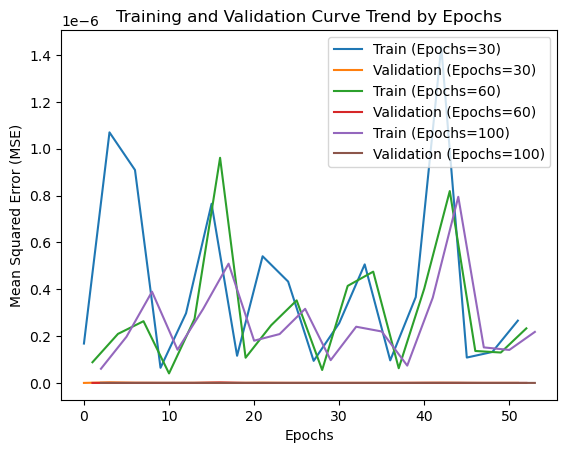

In [86]:
num_epochs_values = [30, 60, 100]
subset_df = df[df['num_epochs'].isin(num_epochs_values)]

for epochs in num_epochs_values:
    subset = subset_df[subset_df['num_epochs'] == epochs]
    mse_train_values = subset['metrics'].apply(lambda x: x['mse_train'])
    mse_val_values = subset['metrics'].apply(lambda x: x['mse_val'])

    plt.plot(mse_train_values, label=f'Train (Epochs={epochs})')
    plt.plot(mse_val_values, label=f'Validation (Epochs={epochs})')

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Curve Trend by Epochs')
plt.legend()
plt.show()

In [87]:
from lstm_train import *
# Set up the LSTM
# Alpha is equal to learning rate for Adam optimizer
lstm = LSTM(hidden_size=predict_size)

# Train the LSTM
num_epochs = 100

#Set up for a non adam optimizer
learning_rate = 0.01

#training
lstm, train_loss_list, val_loss_list = train_lstm_forward(lstm, input_train, target_train, input_test, target_test, sequence_length, num_epochs, learning_rate, perform_predictions=True)
# Make predictions on the test set
predictions = []
for i in range(len(input_test)):
    for j in range(sequence_length):

        x_t = input_test[i][j]
        lstm.forward(x_t)
    predictions.append(lstm.h_t)

 
 
start of training with train lstm forward
Epoch 0 training loss [0.00246972] Validation loss [0.0001185]
Epoch 10 training loss [0.00045296] Validation loss [7.68601857e-07]
Epoch 20 training loss [0.00031892] Validation loss [6.22745635e-07]
Epoch 30 training loss [0.00026653] Validation loss [5.35339533e-07]
Epoch 40 training loss [0.00024871] Validation loss [5.97196908e-07]
Epoch 50 training loss [0.00024386] Validation loss [7.33008843e-07]
Epoch 60 training loss [0.00024555] Validation loss [8.62372656e-07]
Epoch 70 training loss [0.00025258] Validation loss [9.74315556e-07]
Epoch 80 training loss [0.00026426] Validation loss [1.08683251e-06]
Epoch 90 training loss [0.00028035] Validation loss [1.20129453e-06]
Training completed in 102.47 seconds
end of training


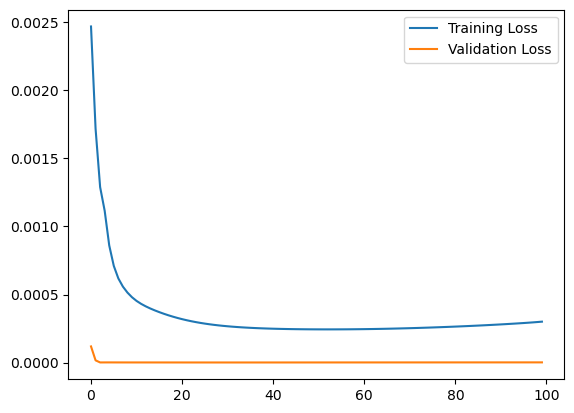

In [88]:
# Flatten the predictions array
predictions = np.array(predictions).flatten()

# Plot the training and validation loss curves
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.legend()
plt.show()

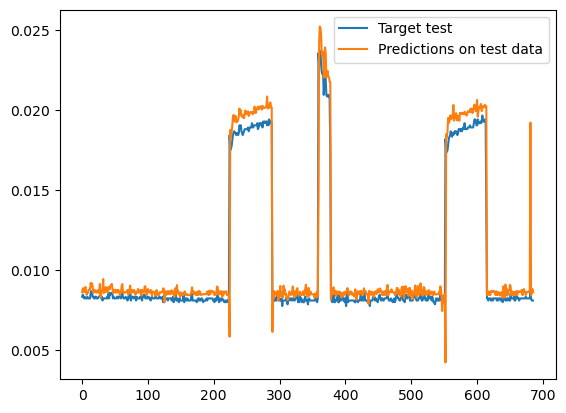

In [89]:
# Plot the predictions against the actual values
plt.plot(target_test.flatten(), label='Target test')
plt.plot(predictions, label='Predictions on test data')
plt.legend()
plt.show()